In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
from joblib import dump



from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


In [38]:
df = pd.read_csv('..\\data\\cleaned\\data.csv')

min_count = 10
city_counts = df['city'].value_counts()
df['city'] = df['city'].apply(lambda x: 'Other' if city_counts[x] < min_count else x)

X = df[['area', 'rooms', 'floor', 'municipality', 'borough', 'city']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (9363, 6)
Test set shape: (2341, 6)


In [39]:
numeric_features = ['area', 'rooms', 'floor']
categorical_features = ['city', 'borough', 'municipality']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Linear regression

In [40]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

In [41]:


prediction_start_time = time.time()
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
prediction_time = time.time() - prediction_start_time

metrics = {
    'R2 Score (Train)': r2_score(y_train, y_pred_train),
    'R2 Score (Test)': r2_score(y_test, y_pred_test),
    
    'RMSE (Train)': np.sqrt(root_mean_squared_error(y_train, y_pred_train)),
    'RMSE (Test)': np.sqrt(root_mean_squared_error(y_test, y_pred_test)),
    
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test),
    
    'Explained Variance (Train)': explained_variance_score(y_train, y_pred_train),
    'Explained Variance (Test)': explained_variance_score(y_test, y_pred_test),
    
    'MAPE (Train)': mean_absolute_percentage_error(y_train, y_pred_train) * 100,
    'MAPE (Test)': mean_absolute_percentage_error(y_test, y_pred_test) * 100,
    
    'Mean Relative Error (Train)': np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100,
    'Mean Relative Error (Test)': np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100,
}

timing_metrics = {
    'Training Time (seconds)': training_time,
    'Prediction Time (seconds)': prediction_time,
    'Average Prediction Time per Sample (ms)': (prediction_time / len(X_test)) * 1000
}

print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:,.2f}")



Model Performance Metrics:
R2 Score (Train): 0.77
R2 Score (Test): 0.70
RMSE (Train): 270.61
RMSE (Test): 245.32
MAE (Train): 34,820.65
MAE (Test): 37,574.57
Explained Variance (Train): 0.77
Explained Variance (Test): 0.70
MAPE (Train): 23.38
MAPE (Test): 28.67
Mean Relative Error (Train): 23.38
Mean Relative Error (Test): 28.67


c:\Users\gatz0\Desktop\Master\Master rad\real-estate-data-hub\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [42]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_metrics = {
    'Cross-Validation Mean R2': cv_scores.mean(),
    'Cross-Validation Std R2': cv_scores.std()
}

c:\Users\gatz0\Desktop\Master\Master rad\real-estate-data-hub\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\gatz0\Desktop\Master\Master rad\real-estate-data-hub\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\gatz0\Desktop\Master\Master rad\real-estate-data-hub\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\gatz0\Desktop\Master\Master rad\real-estate-data-hub\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during tr

In [43]:
print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)

print("\nBasic Metrics:")
for metric in ['R2 Score', 'RMSE', 'MAE']:
    print(f"\n{metric}:")
    print(f"  Train: {metrics[f'{metric} (Train)']:,.3f}")
    print(f"  Test:  {metrics[f'{metric} (Test)']:,.3f}")

print("\nAdvanced Metrics:")
print(f"Explained Variance (Train): {metrics['Explained Variance (Train)']:,.3f}")
print(f"Explained Variance (Test):  {metrics['Explained Variance (Test)']:,.3f}")
print(f"MAPE (Train): {metrics['MAPE (Train)']:,.2f}%")
print(f"MAPE (Test):  {metrics['MAPE (Test)']:,.2f}%")
print(f"Mean Relative Error (Train): {metrics['Mean Relative Error (Train)']:,.2f}%")
print(f"Mean Relative Error (Test):  {metrics['Mean Relative Error (Test)']:,.2f}%")

print("\nCross-Validation Metrics:")
print(f"Mean R2: {cv_metrics['Cross-Validation Mean R2']:,.3f} (±{cv_metrics['Cross-Validation Std R2']:,.3f})")

print("\nTiming Metrics:")
for metric, value in timing_metrics.items():
    print(f"{metric}: {value:,.4f}")


MODEL PERFORMANCE METRICS

Basic Metrics:

R2 Score:
  Train: 0.770
  Test:  0.696

RMSE:
  Train: 270.610
  Test:  245.315

MAE:
  Train: 34,820.651
  Test:  37,574.574

Advanced Metrics:
Explained Variance (Train): 0.770
Explained Variance (Test):  0.696
MAPE (Train): 23.38%
MAPE (Test):  28.67%
Mean Relative Error (Train): 23.38%
Mean Relative Error (Test):  28.67%

Cross-Validation Metrics:
Mean R2: 0.709 (±0.043)

Timing Metrics:
Training Time (seconds): 0.6286
Prediction Time (seconds): 0.0879
Average Prediction Time per Sample (ms): 0.0376


In [44]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

print("\nResidual Statistics:")
print("\nTraining Set:")
print(f"Mean Residual: {residuals_train.mean():,.2f}")
print(f"Residual Std: {residuals_train.std():,.2f}")
print("\nTest Set:")
print(f"Mean Residual: {residuals_test.mean():,.2f}")
print(f"Residual Std: {residuals_test.std():,.2f}")


Residual Statistics:

Training Set:
Mean Residual: 0.00
Residual Std: 73,233.63

Test Set:
Mean Residual: -1,929.54
Residual Std: 60,161.54


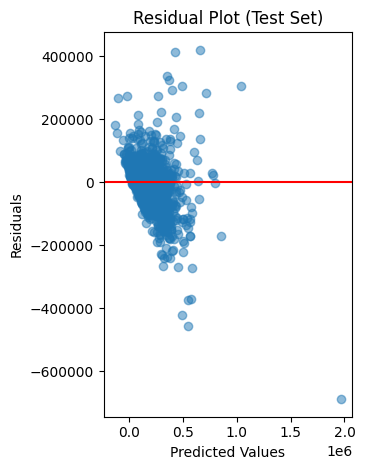

In [45]:
plt.subplot(122)
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()

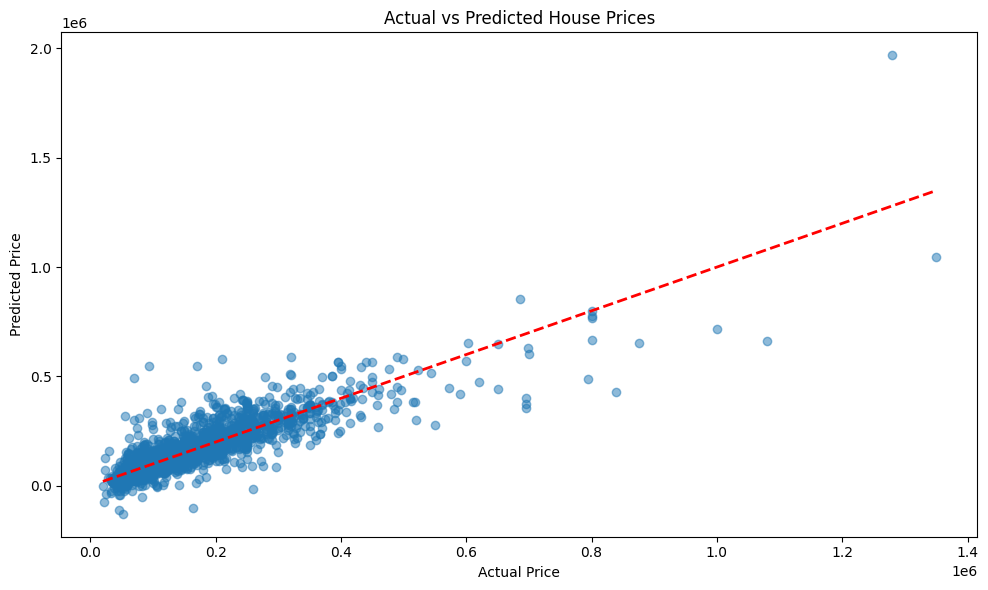

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()


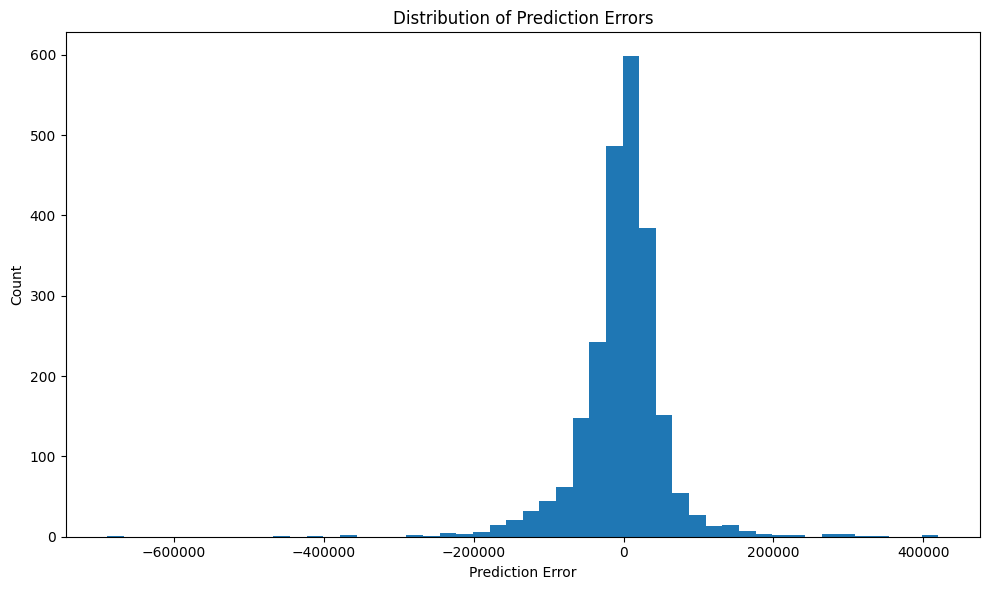

In [47]:
errors = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()

In [ ]:
percentage_errors = (abs(y_test - y_pred_test) / y_test) * 100
print("\nPercentage Error Statistics:")
print(f"Mean percentage error: {percentage_errors.mean():.2f}%")
print(f"Median percentage error: {percentage_errors.median():.2f}%")
print(f"90th percentile of percentage error: {np.percentile(percentage_errors, 90):.2f}%")


Percentage Error Statistics:
Mean percentage error: 33.35%
Median percentage error: 22.97%
90th percentile of percentage error: 69.01%


In [ ]:
dump(model, '..\\models\\linear_regression_model.joblib')

with open('..\\models\\linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Random Forest

In [ ]:
df = pd.read_csv('..\\data\\cleaned\\data.csv')
df.head()


,area,city,floor,location,price,rooms,source,square_price,title,municipality,borough
0,76,Beograd,3.0,"Opština Vračar , Hram svetog Save , Svetog Save",290000,2.0,halooglasi,3816,"Plato Hrama Svetog Save, Vračar, 76m2",Vračar,Hram svetog Save
1,41,Vrnjačka Banja,2.0,"Gradska lokacija , Raj , Kosovska br.1",82000,2.0,halooglasi,2000,Lux stan Akva Park Raj,Gradska lokacija,Raj
2,37,Sokobanja,1.0,"Gradska lokacija , Banjica , Profesora Dragol...",60605,2.0,halooglasi,1650,Direktna prodaja stana u Sokobanji,Gradska lokacija,Banjica
3,34,Sokobanja,3.0,"Gradska lokacija , Banjica , Profesora Dragol...",59488,1.5,halooglasi,1760,Direktna prodaja stana Sokobanja,Gradska lokacija,Banjica
4,55,Beograd,2.0,"Opština Zemun , Altina , Ugrinovački put 8. deo",104500,2.0,halooglasi,1900,"Zemun, Altina, 2.0",Zemun,Altina


In [ ]:
X = df[["area", "city", "municipality", "borough", "rooms"]]
y = df["price"]
X.head()

,area,city,municipality,borough,rooms
0,76,Beograd,Vračar,Hram svetog Save,2.0
1,41,Vrnjačka Banja,Gradska lokacija,Raj,2.0
2,37,Sokobanja,Gradska lokacija,Banjica,2.0
3,34,Sokobanja,Gradska lokacija,Banjica,1.5
4,55,Beograd,Zemun,Altina,2.0


In [ ]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(11704, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          11704 non-null  int64  
 1   city          11704 non-null  object 
 2   floor         11704 non-null  float64
 3   location      11704 non-null  object 
 4   price         11704 non-null  int64  
 5   rooms         11704 non-null  float64
 6   source        11704 non-null  object 
 7   square_price  11704 non-null  int64  
 8   title         11704 non-null  object 
 9   municipality  11704 non-null  object 
 10  borough       11265 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1005.9+ KB
None
area              0
city              0
floor             0
location          0
price             0
rooms             0
source            0
square_price      0
title             0
municipality      0
borough         439
dtype: int64


In [ ]:
min_count = 50 
X = df[["area", "rooms", "floor", "city", "municipality", "borough"]].copy()

X["borough"] = X["borough"].fillna("MISSING")

cat_cols = ["city", "municipality", "borough"]
for c in cat_cols:
    counts = X[c].value_counts()
    to_replace = counts[counts < min_count].index
    X[c] = X[c].replace(to_replace, "OTHER")

for c in cat_cols:
    print(f"{c}: unique={X[c].nunique()}, sample values: {X[c].value_counts().head(8).to_dict()}")


city: unique=13, sample values: {'Beograd': 5618, 'Novi Sad': 3141, 'Niš': 844, 'OTHER': 444, 'Zlatibor': 314, 'Vrnjačka Banja': 313, 'Kragujevac': 243, 'Kopaonik': 192}
municipality: unique=21, sample values: {'Novi Sad': 2473, 'OTHER': 1370, 'Gradska lokacija': 1111, 'Novi Beograd': 691, 'Voždovac': 686, 'Zvezdara': 635, 'Palilula': 586, 'Zemun': 510}
borough: unique=50, sample values: {'OTHER': 4900, 'Centar': 1182, 'MISSING': 439, 'Gradske lokacije': 396, 'Telep': 351, 'Petrovaradin': 220, 'Novo Naselje': 193, 'Mirijevo': 191}


In [ ]:

y = df["price"].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


X_train: (9363, 6) X_test: (2341, 6)
y_train: (9363,) y_test: (2341,)


In [ ]:


categorical_cols = ["city","municipality","borough"]
numeric_cols = ["area","rooms","floor"]

X_train[numeric_cols] = X_train[numeric_cols].astype(float)
X_test[numeric_cols] = X_test[numeric_cols].astype(float)

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_cols, index=X_train.index)
X_test_cat_df  = pd.DataFrame(X_test_cat,  columns=encoded_cols, index=X_test.index)

X_train_prepared = pd.concat([X_train[numeric_cols], X_train_cat_df], axis=1).reset_index(drop=True)
X_test_prepared  = pd.concat([X_test[numeric_cols],  X_test_cat_df],  axis=1).reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print("Prepared shapes -> X_train:", X_train_prepared.shape, "X_test:", X_test_prepared.shape)


Prepared shapes -> X_train: (9363, 87) X_test: (2341, 87)


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
t0 = time.time()
rf.fit(X_train_prepared, y_train)
t1 = time.time()
print(f"Trained RandomForest in {t1 - t0:.1f} seconds")

Trained RandomForest in 0.5 seconds


In [ ]:
y_pred = rf.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R^2: {r2:.4f}")

MAE: 28,146.45
RMSE: 50,937.33
R^2: 0.7819


In [ ]:
dump(model, '..\\models\\random_forest_model.joblib')

with open('..\\models\\random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)